In [26]:
import pandas as pd
import numpy as np


In [27]:
#Predicting what price competitors will put for a specific flight (top 10 competitors for example)

In [28]:
file = "SkyScannerRedirrect_DataScienceBootCamp.csv"

In [29]:
df = pd.read_csv(file)

In [ ]:
# Flights that are eurowing flights

df[df["isEWRoute"] == 1]

,flightWeek,OriginAirport,DestinationAirport,OriginCountry,DestinationCountry,mainCarrier,isConnectingFlight,isEWRoute,Market,UserCountryCode,...,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Revenue,Segments,ODPax,TripPax,weekOfYear,Average_FlightFare
15,2024-W23,DUS,LHR,DE,GB,EW,0,1,UK,GB,...,ONE_WAY,NaN,39,2,459.59,3,2,3,2024-W18,153.196667
38,2024-W22,STR,LHR,DE,GB,EW,0,1,DE,DE,...,RETURN,3.0,28,7,4408.41,26,14,13,2024-W18,169.554231
45,2024-W36,AGP,CGN,ES,DE,FR,0,1,DE,DE,...,ONE_WAY,NaN,127,4,583.66,8,4,8,2024-W18,72.957500
51,2024-W20,TFS,DUS,ES,DE,XR,0,1,ES,ES,...,ONE_WAY,NaN,14,1,94.72,1,1,1,2024-W18,94.720000
60,2024-W20,CGN,TIA,DE,AL,W4,0,1,DE,DE,...,RETURN,14.0,16,2,462.17,8,4,4,2024-W18,57.771250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048510,2024-W18,FMM,PMI,DE,ES,FR,0,1,DE,DE,...,RETURN,7.0,1,2,372.89,4,4,2,2024-W18,93.222500
1048513,2024-W19,DUS,MUC,DE,DE,EW,0,1,DE,DE,...,RETURN,1.0,11,2,457.59,4,4,2,2024-W18,114.397500
1048524,2024-W34,VIE,HAM,AT,DE,EW,0,1,DE,DE,...,ONE_WAY,NaN,114,1,149.67,1,1,1,2024-W18,149.670000
1048535,2024-W19,HAM,MAN,DE,GB,EW,0,1,UK,GB,...,ONE_WAY,NaN,9,1,85.19,1,1,1,2024-W18,85.190000


In [31]:
df.drop(columns=["flightWeek", "weekOfYear", "Revenue"], inplace=True)

In [32]:
#df["mainCarrier"].value_counts().count()
#number of different airlines

In [33]:
#((df["mainCarrier"].value_counts() > 10) == True)


In [34]:
#value_counts = df["mainCarrier"].value_counts()

# Filter to get only those counts greater than 10
#counts_greater_than_10 = value_counts > 1000

# Sum the True values to get the count of mainCarriers with more than 10 occurrences
#count_of_mainCarriers_above_1000 = counts_greater_than_10.sum()
#count_of_mainCarriers_above_1000

In [35]:
#count_of_mainCarriers_above_1000

# Random fuckery

In [36]:
import seaborn as sns

In [37]:
#sns.heatmap(correlation, annot=True)

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Preprocessing



In [ ]:
def OHE_filtering(col):
    """ This function renames unpopular destinations to Other such that less columns will be generated during
    the one hot encoding"""

    """BE CAREFUL!!! Only run once as otherwise the destinations will be split into smaller and smaller chunks"""
    avg_of_val = (df[col].value_counts().mean())


    # This is filtering for values above the mean, ones that I deem important and will be OHE with their actual identifier
    filtered_airports_uniques = (df[col].value_counts() > avg_of_val)
    uniques_encoding = filtered_airports_uniques.index[filtered_airports_uniques].tolist()

    # Filtering for the less important ones (less common), will bundle them up in a Rest column in OHE
    filtered_airports_rest = (df[col].value_counts() <= avg_of_val)
    rest_encoding = filtered_airports_rest.index[filtered_airports_rest].tolist()
    rest_encoding.sort()
    print(rest_encoding)

    # What I want to do now is based on these values, I want to call all rest_ECONDING to be renamed to "Other"
    # and keep unique as they are

    df.loc[df[col].isin(rest_encoding), [col]] = ["Other"]

In [ ]:
# Put all features to be one hot encoded into this list below
# It is messing up when I do it this way with all at the same time in the for loop, ask why???
categorical_columns = df.dtypes[(df.dtypes == "object")].index
categorical_columns = categorical_columns.drop(["cabinClass", "kind"])
categorical_columns
#OHE_VARIABLES = ["OriginAirport", "DestinationAirport", "OriginCountry", "DestinationCountry", "mainCarrier", "Market", "UserCountryCode"]

Index(['OriginAirport', 'DestinationAirport', 'OriginCountry',
       'DestinationCountry', 'mainCarrier', 'Market', 'UserCountryCode'],
      dtype='object')

In [41]:
print(list(categorical_columns))
for ohe_var in list(categorical_columns):
    print(ohe_var)
    OHE_filtering(ohe_var)
df

['OriginAirport', 'DestinationAirport', 'OriginCountry', 'DestinationCountry', 'mainCarrier', 'Market', 'UserCountryCode']
OriginAirport
['AAE', 'AAL', 'AAR', 'ABJ', 'ABV', 'ABZ', 'ACC', 'ACE', 'ACH', 'ADA', 'ADD', 'ADF', 'AES', 'AEY', 'AGA', 'AGH', 'AHB', 'AHO', 'AHU', 'AJA', 'AJF', 'AJI', 'AKX', 'ALA', 'ALF', 'ANR', 'AOE', 'AOI', 'AOK', 'AQI', 'AQJ', 'ASB', 'ASR', 'ASW', 'AUR', 'AXD', 'BAH', 'BAL', 'BAY', 'BBU', 'BCM', 'BDS', 'BDU', 'BEM', 'BEN', 'BES', 'BGG', 'BGO', 'BGW', 'BHD', 'BHH', 'BHK', 'BIA', 'BIQ', 'BJA', 'BJL', 'BJV', 'BJZ', 'BKO', 'BLJ', 'BLL', 'BMA', 'BNX', 'BOH', 'BOJ', 'BOO', 'BRN', 'BRQ', 'BSK', 'BSR', 'BTS', 'BUS', 'BVC', 'BVE', 'BWK', 'BZG', 'BZO', 'BZR', 'CAG', 'CCF', 'CDT', 'CFE', 'CFK', 'CFN', 'CFR', 'CFU', 'CHQ', 'CIT', 'CIY', 'CKY', 'CKZ', 'CLJ', 'CLY', 'CND', 'COO', 'CRA', 'CRV', 'CUF', 'CWL', 'CZL', 'DAM', 'DBV', 'DEB', 'DIY', 'DJE', 'DLE', 'DLM', 'DMM', 'DND', 'DNZ', 'DOH', 'DOL', 'DRS', 'DSS', 'DWC', 'DYU', 'EAM', 'EAS', 'EBA', 'EBJ', 'EBL', 'ECN', 'EDO', '

['1B', '1L', '2L', '2N*', '3F', '3L', '3Z', '4M', '4O', '4R', '4X', '4Y', '5F', '5K', '5M*', '5O', '5W', '6B', '6E', '6H', '6K', '6Y', '7O', '8H', '8R', '8U', 'A0', 'A2', 'A5', 'A9', 'AA', 'AC', 'AH', 'AI', 'AP', 'B2', 'B4', 'B5', 'B9', 'BI', 'BJ', 'BN', 'BQ', 'BS', 'BU', 'BZ', 'C3', 'C6', 'CD', 'CE', 'CJ', 'CL', 'CP', 'CY', 'D4', 'DI', 'DN*', 'DT', 'DV', 'DX', 'E4*', 'E5', 'E6', 'E8', 'EA', 'EC', 'EE', 'EN', 'EP', 'ET', 'EY', 'EZ', 'F3', 'FB', 'FH', 'FI', 'FL', 'FT', 'FZ', 'G6', 'G9', 'GF', 'GJ', 'GM', 'GQ', 'GR', 'GW*', 'H1', 'H3', 'H4', 'H6*', 'H7', 'HC', 'HF', 'HH', 'HN*', 'HP', 'HR', 'HT', 'HU', 'HY', 'I2', 'IA', 'IR', 'IV', 'IZ', 'J2', 'J9', 'JU', 'KA', 'KC', 'KC*', 'KK', 'KM', 'KP', 'KQ', 'KS', 'KU', 'L6', 'LA', 'LG', 'LM', 'M2', 'ME', 'MI', 'N0', 'N7', 'NE', 'NI', 'NL', 'NO', 'NP', 'NT', 'OA', 'OE', 'OG', 'OK', 'OR', 'OU', 'OV', 'P4', 'P6', 'PE', 'PQ', 'Q4', 'QB', 'QS', 'QU', 'RC', 'RE', 'RJ', 'RO', 'RP', 'S4', 'SE', 'SF', 'SI', 'SM', 'SP', 'SQ', 'SR', 'SS', 'SZ', 'T3', 'T5', '

,OriginAirport,DestinationAirport,OriginCountry,DestinationCountry,mainCarrier,isConnectingFlight,isEWRoute,Market,UserCountryCode,cabinClass,kind,TripLengthNights,TravelHorizonDays,RedirectsCount,Segments,ODPax,TripPax,Average_FlightFare
0,ALC,OPO,ES,PT,FR,0,0,ES,ES,ECONOMY,RETURN,4.0,41,9,66,18,33,59.316212
1,LTN,JMK,GB,GR,U2,1,0,UK,GB,ECONOMY,RETURN,4.0,89,1,4,2,2,152.727500
2,Other,BCN,Other,ES,Other,1,0,UK,RO,ECONOMY,RETURN,3.0,3,2,4,4,2,177.797500
3,NTE,PMO,FR,IT,TO,0,0,FR,FR,ECONOMY,RETURN,14.0,78,4,30,8,15,146.880000
4,FRA,MLA,DE,Other,LH,0,0,DE,DE,ECONOMY,RETURN,7.0,93,15,58,30,29,179.285690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,BLQ,Other,IT,Other,W6,0,0,AU,AU,ECONOMY,ONE_WAY,NaN,92,2,4,2,4,120.817500
1048571,BRU,KGS,BE,GR,SN,0,0,BE,BE,ECONOMY,RETURN,7.0,80,1,4,2,2,384.900000
1048572,GOT,Other,SE,Other,TK,1,0,SE,SE,ECONOMY,RETURN,30.0,33,1,6,2,3,591.841667
1048573,MXP,BEG,IT,Other,Other,0,0,IT,AT,ECONOMY,ONE_WAY,NaN,115,1,1,1,1,90.110000


In [42]:
numeric_columns = df.dtypes[(df.dtypes == "int64") | (df.dtypes == "float64")].index
numeric_columns = numeric_columns.drop("Average_FlightFare")
numeric_columns

Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')

In [ ]:
numeric_columns

Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')

In [44]:
correlation = df[list(numeric_columns) + ["Average_FlightFare"]].corr()

<AxesSubplot:>

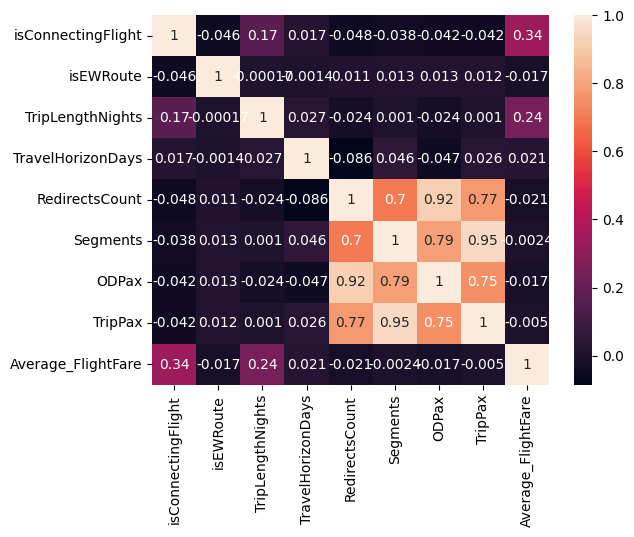

In [45]:
sns.heatmap(correlation, annot=True)

In [ ]:
# Categorical_columns = df.dtypes[(df.dtypes == "object")].index
# Categorical_columns

In [47]:
ordinal_columns = df.dtypes[(df.dtypes == "object")].index
ordinal_columns = ordinal_columns.drop(["OriginAirport",
                                        "DestinationAirport",
                                        "OriginCountry",
                                        "DestinationCountry",
                                        "mainCarrier",
                                        "Market",
                                        "UserCountryCode"])
ordinal_columns

Index(['cabinClass', 'kind'], dtype='object')

In [ ]:
# df["DestinationAirport"].value_counts()

In [ ]:
# Ordinal_columns = df[["cabinClass", "kind"]].index

In [50]:
num_transformer = StandardScaler()

In [51]:
ordinal_transformer = OrdinalEncoder()

In [52]:
cat_transformer = OneHotEncoder(sparse_output=False)

In [53]:
preproc_basic = make_column_transformer(
    (num_transformer, numeric_columns),
    (ordinal_transformer, ordinal_columns),
    (cat_transformer, categorical_columns),
    #DONT FORGET TO DO TRANSFORMER FOR THE SIN COS OF THE TIME ONES I DORPPED fo final
    remainder='passthrough'
)

In [54]:
preproc_basic

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')),
                                ('ordinalencoder', OrdinalEncoder(),
                                 Index(['cabinClass', 'kind'], dtype='object')),
                                ('onehotencoder',
                                 OneHotEncoder(sparse_output=False),
                                 Index(['OriginAirport', 'DestinationAirport', 'OriginCountry',
       'DestinationCountry', 'mainCarrier', 'Market', 'UserCountryCode'],
      dtype='object'))])

In [55]:
pipe = make_pipeline(preproc_basic, RandomForestRegressor())

In [56]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  Index(['cabinClass', 'kind'], dtype='object')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  Index(['OriginAirport', 'DestinationAirport', 'OriginCountry',
       'DestinationCountry', 'mainCarrier', 'Market', 'UserCountryCode'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [57]:
df.dropna(inplace=True)

In [58]:
X = df.drop(columns=["Average_FlightFare"])
y = df["Average_FlightFare"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [60]:
X_train.columns


Index(['OriginAirport', 'DestinationAirport', 'OriginCountry',
       'DestinationCountry', 'mainCarrier', 'isConnectingFlight', 'isEWRoute',
       'Market', 'UserCountryCode', 'cabinClass', 'kind', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')

In [61]:
numeric_columns

Index(['isConnectingFlight', 'isEWRoute', 'TripLengthNights',
       'TravelHorizonDays', 'RedirectsCount', 'Segments', 'ODPax', 'TripPax'],
      dtype='object')

In [62]:
categorical_columns

Index(['OriginAirport', 'DestinationAirport', 'OriginCountry',
       'DestinationCountry', 'mainCarrier', 'Market', 'UserCountryCode'],
      dtype='object')

In [63]:
ordinal_columns

Index(['cabinClass', 'kind'], dtype='object')

In [64]:
y

0           59.316212
1          152.727500
2          177.797500
3          146.880000
4          179.285690
              ...    
1048566    241.920000
1048568     28.170000
1048571    384.900000
1048572    591.841667
1048574     32.830000
Name: Average_FlightFare, Length: 627611, dtype: float64

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
import pickle

In [ ]:
model_filename = "takeoff/pipeline.pkl"
model = pickle.load(open(model_filename,"rb"))